In [678]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import bisect
from collections import Counter

In [679]:
#parameters

n = 20 #number of trials
p = 0.6 #probability of success

In [680]:
#Single time calculations of all x values in CDF

cdf_values = np.zeros(n+1)

for i in range(0,n+1):
    cdf_values[i] = sp.binom.cdf(i,n,p)

In [692]:
#using one U(0,1) number, sample from a binom(n,p)

unif_num = np.random.uniform(0,1) #single uniform U(0,1) realization

successes = bisect.bisect_left(cdf_values, unif_num) #use binary search to find the number of successes

print(f"{successes} successes")

13 successes


In [686]:
#repeat this sampling process many times to approximate the PMF

repititions = 10000 #amount of binomials to realize to approximate PMF

arr_unif_num = np.random.uniform(0,1,repititions) #uniform U(0,1) realization stored in an array
arr_successes = np.zeros(repititions)

for i in range(0, repititions):
    arr_successes[i] = bisect.bisect_left(cdf_values, arr_unif_num[i]) #fill array wuth number of successes

result_dict = Counter(arr_successes) #use a dictionary to match key value pairs

for j in result_dict:
    result_dict[j] = result_dict[j] / repititions #reformat as percentage

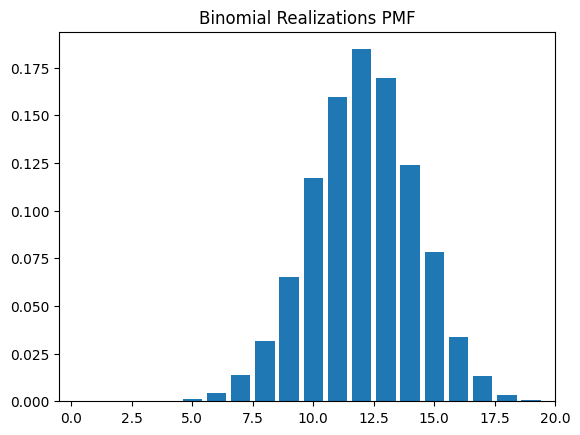

In [687]:
#chart the PMF approximation

x_axis_titles = list(result_dict.keys()) #number of successes
heights = list(result_dict.values()) #percentage of successes occuring at x

plt.title("Binomial Realizations PMF")
plt.bar(x_axis_titles, heights)
plt.xlim(-0.5, n) #stops the x axis at the max value

plt.show()